In [2]:
#importando sqlite3
import sqlite3

In [3]:
# cria uma conexão com o banco de dados
# se o banco de dados não existir, ele é criado no momento 
con = sqlite3.connect('escola.db')

In [4]:
type(con)

sqlite3.Connection

In [5]:
# criando um cursos
#(um cursor permite percorrer todos os registros em um conjunto de dados)
cur = con.cursor()

In [6]:
type(cur)

sqlite3.Cursor

In [7]:
#cria uma instrução sql 
sql_create = 'create table cursos '\
'(id integer primary key, '\
'titulo varchar(100), '\
'categoria varchar(140))'


In [8]:
# executando a instrução sql no cursor
cur.execute(sql_create)

OperationalError: table cursos already exists

In [9]:
# criando outra sentença sql para inserir registros
sql_insert = 'insert into cursos values (?, ?, ?)'


In [10]:
#dados 
recset = [(1000, 'Ciencia de Dados', 'Data Science'),
          (1001, 'Big Data Fundamentos', 'Big Data'),
          (1002, 'Python Fundamentos', 'Análise de Dados')]

In [11]:
# inserindo os registros 
for rec in recset:
    cur.execute(sql_insert, rec)

IntegrityError: UNIQUE constraint failed: cursos.id

In [12]:
# grava a transação 
con.commit()

In [13]:
# criando outra sentença sql para selecionar registros 
sql_select = 'select * from cursos'

In [14]:
#seleciona todos os registros
cur.execute(sql_select)

In [15]:
# recupera os resultados 
dados = cur.fetchall()

In [16]:
# mostra
for linha in dados:
    print('curso id: %d, Título: %s, categoria %s \n' %linha)

curso id: 1000, Título: Ciencia de Dados, categoria Data Science 

curso id: 1001, Título: Big Data Fundamentos, categoria Big Data 

curso id: 1002, Título: Python Fundamentos, categoria Análise de Dados 



In [20]:
# gerando outros registros 
recent = [(10031, 'gestão de dados com mongodb', 'big data'), 
         (10041, 'r fundamentos', 'análise de dados')]

# inserindo os registros 
for rec in recset:
    cur.execute(sql_insert, rec)
    
#gravando a transação 
con.commit()

IntegrityError: UNIQUE constraint failed: cursos.id

In [19]:
#seleciona todos os registros
cur.execute('select * from cursos')

# recupera os resultados
recset = cur.fetchall()

#mostra
for rec in recset:
    print('curso id: %d, Título: %s, categoria %s \n' %rec)

curso id: 1000, Título: Ciencia de Dados, categoria Data Science 

curso id: 1001, Título: Big Data Fundamentos, categoria Big Data 

curso id: 1002, Título: Python Fundamentos, categoria Análise de Dados 



In [21]:
# fecha a conexão 
con.close()

In [29]:
import sqlite3

#criando uma conexão 
conn = sqlite3.connect('dsa.db')

#criando um cursor
c = conn.cursor()

#função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
              
#função para inserir uma linha
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2016-05-02 14:32:11', 'Teclado', 90)")
    conn.commit()
    c.close()
    conn.close()

In [33]:
#criar tabela
create_table()

ProgrammingError: Cannot operate on a closed cursor.

In [32]:
#inserir dados 
data_insert()

ProgrammingError: Cannot operate on a closed cursor.

In [39]:
import sqlite3
import random
import time
import datetime

#criando uma conexão 
conn = sqlite3.connect('dsa.db')

#criando um cursos
c = conn.cursor()

#funçao para criar uma linha 
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2016-05-02 14:32:11', 'Teclado', 90)")
    conn.commit()
    c.close()
    conn.close()
    
# usando variáveis para inserir dados 
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()

In [40]:
# gerando valores e inserindo na tabela 
for i in range(10):
    data_insert_var()
    time.sleep(1)

In [41]:
# encerrando a conexão 
c.close()
conn.close()

In [46]:
import sqlite3
import random
import time
import datetime

#criando uma conexão 
conn = sqlite3.connect('dsa.db')

#criando um cursos
c = conn.cursor()

#função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
#funçao para criar uma linha 
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2016-05-02 14:32:11', 'Teclado', 90)")
    conn.commit()
    c.close()
    conn.close()
    
# usando variáveis para inserir dados 
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()

#Leitura de dados 
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
#Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)
        
#Leitura de colunas específicas 
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])
    
    

In [47]:
#select nos dados 
leitura_todos_dados()

(10, '2016-05-02 14:32:11', 'Teclado', 90.0)
(11, '2018-01-19 14:57:11.656884', 'Monitor', 80.0)
(12, '2018-01-19 14:57:12.826584', 'Monitor', 88.0)
(13, '2018-01-19 14:57:13.924802', 'Monitor', 86.0)
(14, '2018-01-19 14:57:15.031505', 'Monitor', 90.0)
(15, '2018-01-19 14:57:16.172918', 'Monitor', 95.0)
(16, '2018-01-19 14:57:17.245717', 'Monitor', 93.0)
(17, '2018-01-19 14:57:18.342091', 'Monitor', 57.0)
(18, '2018-01-19 14:57:19.444543', 'Monitor', 99.0)
(19, '2018-01-19 14:57:20.556221', 'Monitor', 64.0)
(20, '2018-01-19 14:57:21.684953', 'Monitor', 50.0)


In [48]:
#leitura registros específicos 
leitura_registros()

(10, '2016-05-02 14:32:11', 'Teclado', 90.0)
(11, '2018-01-19 14:57:11.656884', 'Monitor', 80.0)
(12, '2018-01-19 14:57:12.826584', 'Monitor', 88.0)
(13, '2018-01-19 14:57:13.924802', 'Monitor', 86.0)
(14, '2018-01-19 14:57:15.031505', 'Monitor', 90.0)
(15, '2018-01-19 14:57:16.172918', 'Monitor', 95.0)
(16, '2018-01-19 14:57:17.245717', 'Monitor', 93.0)
(18, '2018-01-19 14:57:19.444543', 'Monitor', 99.0)
(19, '2018-01-19 14:57:20.556221', 'Monitor', 64.0)


In [49]:
leitura_colunas()

90.0
80.0
88.0
86.0
90.0
95.0
93.0
57.0
99.0
64.0
50.0


In [50]:
# encerrando a conexão 
c.close()
conn.close()

In [59]:
import sqlite3
import random
import time
import datetime

#criando uma conexão 
conn = sqlite3.connect('dsa.db')

#criando um cursos
c = conn.cursor()

#função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
#funçao para criar uma linha 
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2016-05-02 14:32:11', 'Teclado', 90)")
    conn.commit()
    c.close()
    conn.close()
    
# usando variáveis para inserir dados 
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()

#Leitura de dados 
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
#Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)
        
#Leitura de colunas específicas 
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])
        
#Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.0 WHERE valor = 80.0")
    conn.commit()
    
#Delete 
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 50.0")
    conn.commit()

In [53]:
atualiza_dados()

In [60]:
leitura_todos_dados()

(10, '2016-05-02 14:32:11', 'Teclado', 90.0)
(11, '2018-01-19 14:57:11.656884', 'Monitor', 70.0)
(12, '2018-01-19 14:57:12.826584', 'Monitor', 88.0)
(13, '2018-01-19 14:57:13.924802', 'Monitor', 86.0)
(14, '2018-01-19 14:57:15.031505', 'Monitor', 90.0)
(15, '2018-01-19 14:57:16.172918', 'Monitor', 95.0)
(16, '2018-01-19 14:57:17.245717', 'Monitor', 93.0)
(17, '2018-01-19 14:57:18.342091', 'Monitor', 57.0)
(18, '2018-01-19 14:57:19.444543', 'Monitor', 99.0)
(19, '2018-01-19 14:57:20.556221', 'Monitor', 64.0)
(20, '2018-01-19 14:57:21.684953', 'Monitor', 50.0)


Gráficos


In [62]:
import sqlite3
import random
import datetime
import matplotlib.pyplot as plt 
%matplotlib notebook 

#criando uma conexão 
conn = sqlite3.connect('dsa.db')

#criando um cursos
c = conn.cursor()

#função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
#funçao para criar uma linha 
def data_insert():
    c.execute("INSERT INTO produtos VALUES(10, '2016-05-02 14:32:11', 'Teclado', 90)")
    conn.commit()
    c.close()
    conn.close()
    
# usando variáveis para inserir dados 
def data_insert_var():
    new_date = datetime.datetime.now()
    new_prod_name = 'Monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()

#Leitura de dados 
def leitura_todos_dados():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha)
        
#Leitura de registros específicos
def leitura_registros():
    c.execute("SELECT * FROM PRODUTOS WHERE valor > 60.0")
    for linha in c.fetchall():
        print(linha)
        
#Leitura de colunas específicas 
def leitura_colunas():
    c.execute("SELECT * FROM PRODUTOS")
    for linha in c.fetchall():
        print(linha[3])
        
#Update
def atualiza_dados():
    c.execute("UPDATE produtos SET valor = 70.0 WHERE valor = 80.0")
    conn.commit()
    
#Delete 
def remove_dados():
    c.execute("DELETE FROM produtos WHERE valor = 50.0")
    conn.commit()
    
    
#gerar gráficos com os dados 
def dados_grafico():
    c.execute("SELECT id, valor FROM produtos")
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
        
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


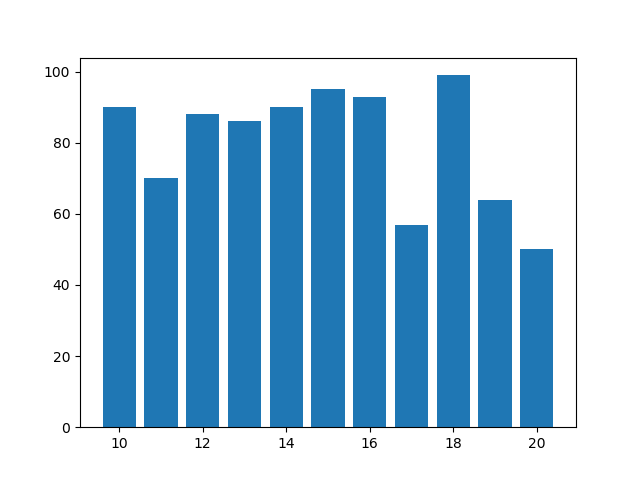

In [63]:
# gerando gráficos 
dados_grafico()